### Dataset location : <a href="https://www.kaggle.com/uciml/sms-spam-collection-dataset">SMS Spam Collection Dataset</a>

In [1]:
import pandas as pd
data = pd.read_csv("datasets/spam.csv", encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Removing unwanted columns

In [2]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [4]:
data.columns = ['label', 'message']

In [5]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preprocessing

In [6]:
df = data.copy()
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
data['label'] = data['label'].map({'ham' : 0, 'spam':1})

In [8]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [10]:
X = data['message']
y = data['label']

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

vocab_size = 4000
max_length = 20

In [12]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

print("Index of out of vocab token : ", tokenizer.word_index['<OOV>'])
print()

for i in range(10):
    print(X[i])
    print(sequences[i])
    print()

padded = pad_sequences(sequences, maxlen=max_length, padding='post')

Index of out of vocab token :  1

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
[51, 470, 1, 842, 752, 658, 65, 9, 1325, 90, 122, 350, 1326, 148, 2988, 1327, 68, 59, 1, 145]

Ok lar... Joking wif u oni...
[47, 337, 1496, 471, 7, 1930]

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
[48, 487, 9, 20, 5, 797, 900, 3, 179, 1931, 1200, 659, 1932, 2321, 268, 2322, 72, 1931, 3, 1933, 3, 338, 487, 555, 956, 74, 389, 180, 660, 390, 2989]

U dun say so early hor... U c already then say...
[7, 246, 153, 24, 380, 2990, 7, 141, 155, 58, 153]

Nah I don't think he goes to usf, he lives around here though
[1019, 2, 99, 108, 70, 488, 3, 957, 70, 1934, 219, 112, 472]

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
[798, 128, 68, 1

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded, y, test_size = 0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5014, 20)
(558, 20)
(5014,)
(558,)


### Model buliding

In [14]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras import Model

embedding_dimensions = 64
lstm_hidden_length = 20
dense_outputs = 1
epochs = 20

i = Input(shape=(max_length, ))
x = Embedding(vocab_size , embedding_dimensions)(i)
x = LSTM(lstm_hidden_length, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 64)            256000    
_________________________________________________________________
lstm (LSTM)                  (None, 20, 20)            6800      
_________________________________________________________________
global_max_pooling1d (Global (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 262,821
Trainable params: 262,821
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [15]:
history = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/20
157/157 [==============================] - 2s 11ms/step - loss: 0.2842 - accuracy: 0.9232
Epoch 2/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0581 - accuracy: 0.9888
Epoch 3/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0290 - accuracy: 0.9952
Epoch 4/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0171 - accuracy: 0.9968
Epoch 5/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0115 - accuracy: 0.9978
Epoch 6/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0077 - accuracy: 0.9992
Epoch 7/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0061 - accuracy: 0.9992
Epoch 8/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0049 - accuracy: 0.9992
Epoch 9/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 10/20
157/157 [==============================] - 2s 10ms/step - loss: 0.0038 - accura

### Analysis and Testing

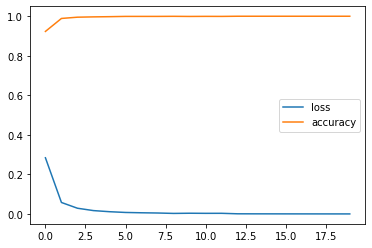

In [16]:
import matplotlib.pyplot as plt
h = history.history
plt.plot(range(epochs), h['loss'], label='loss')
plt.plot(range(epochs), h['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [17]:
pred = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix

res = []
for i in pred:
    if i[0]>0.5:
        res.append(1)
    else :
        res.append(0)
c = confusion_matrix(res, y_test)
print(c)

[[471  12]
 [  1  74]]


In [19]:
print("Accuracy : ", (c[0][0]+c[1][1])/(sum(c[0])+sum(c[1])))

Accuracy :  0.9767025089605734
